In [1]:
#Brian Lee HW3 Q4
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [2]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    """784-3 one layer network that trains the output layer using torch.nn.Linear(784,3) on input x

    Parameters:
    x: batch that we are currently training

    Return:
    outputs: returns trained value
    """
    
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        self.output = torch.nn.Linear(784,3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        outputs = self.output(x)
        ### ========== TODO : END ========== ###
        return outputs

In [4]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    """784-400-3 one layer network that trains the hidden layer, applies the sigmoid function to that layer, and then trains the output layer given an input x.

    Parameters:
    x: batch that we are currently training

    Return:
    outputs: returns trained value
    """

    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        self.hidden = torch.nn.Linear(784,400)
        self.output = torch.nn.Linear(400,3)
        self.sigmoid = torch.nn.Sigmoid()
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function
        x1 = self.hidden(x)
        x2 = self.sigmoid(x1)
        outputs = self.output(x2)
        ### ========== TODO : END ========== ###
        return outputs

In [5]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [6]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [7]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()
        
    return total_loss / len(dataloader)

In [8]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()
        
    return total_acc / len(dataloader.dataset)

In [9]:
def train(model, criterion, optimizer, train_loader, valid_loader):
    """Trains model using the data given, as well as the criterion and optimizer that are specified.

    Parameters:
    model: model to be trained
    criterion: criterion to be used
    optimizer: optimizer to be used
    train_loader: training data to be used
    valid_loader: validation data to be used

    Return:
    train_loss_list: list containing the training loss values
    valid_loss_list: list containing the validation loss values
    train_acc_list: list containing the training accuracy values
    valid_acc_list: list containing the validation accuracy values
    """

    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, 31):
        model.train()
        for batch_X, batch_y in train_loader:
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            optimizer.zero_grad()
            outputs = model(batch_X) 
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            ### ========== TODO : END ========== ###
   
        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

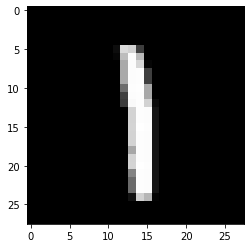

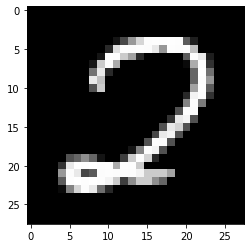

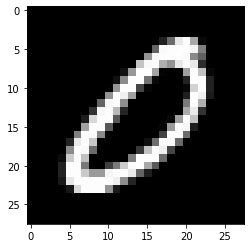

Data preparation...
Start training OneLayerNetwork...
| epoch  1 | train loss 1.075380 | train acc 0.453333 | valid loss 1.084895 | valid acc 0.453333 |
| epoch  2 | train loss 1.021346 | train acc 0.553333 | valid loss 1.031047 | valid acc 0.553333 |
| epoch  3 | train loss 0.972644 | train acc 0.636667 | valid loss 0.982694 | valid acc 0.593333 |
| epoch  4 | train loss 0.928405 | train acc 0.716667 | valid loss 0.938914 | valid acc 0.640000 |
| epoch  5 | train loss 0.887945 | train acc 0.783333 | valid loss 0.898984 | valid acc 0.713333 |
| epoch  6 | train loss 0.850814 | train acc 0.826667 | valid loss 0.862425 | valid acc 0.753333 |
| epoch  7 | train loss 0.816609 | train acc 0.850000 | valid loss 0.828788 | valid acc 0.800000 |
| epoch  8 | train loss 0.784975 | train acc 0.886667 | valid loss 0.797735 | valid acc 0.846667 |
| epoch  9 | train loss 0.755659 | train acc 0.896667 | valid loss 0.768974 | valid acc 0.866667 |
| epoch 10 | train loss 0.728426 | train acc 0.903333 |

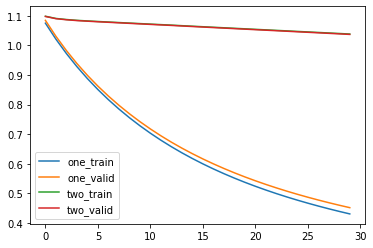

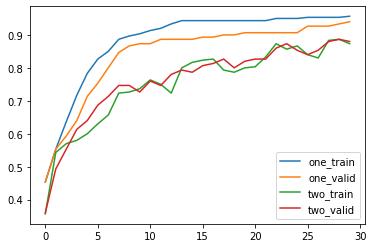

test accuracy of one layer manual:  tensor(96.)
test accuracy of two layer manual:  tensor(84.6667)
test accuracy of one layer:  tensor(0.9600)
test accuracy of two layer:  tensor(0.8467)
Start training OneLayerNetwork with Adam...
| epoch  1 | train loss 0.711971 | train acc 0.890000 | valid loss 0.708361 | valid acc 0.873333 |
| epoch  2 | train loss 0.491814 | train acc 0.963333 | valid loss 0.497311 | valid acc 0.940000 |
| epoch  3 | train loss 0.370439 | train acc 0.973333 | valid loss 0.380523 | valid acc 0.946667 |
| epoch  4 | train loss 0.298872 | train acc 0.973333 | valid loss 0.312712 | valid acc 0.953333 |
| epoch  5 | train loss 0.251291 | train acc 0.980000 | valid loss 0.267801 | valid acc 0.953333 |
| epoch  6 | train loss 0.217758 | train acc 0.983333 | valid loss 0.236601 | valid acc 0.953333 |
| epoch  7 | train loss 0.192742 | train acc 0.980000 | valid loss 0.213194 | valid acc 0.953333 |
| epoch  8 | train loss 0.172962 | train acc 0.986667 | valid loss 0.195550

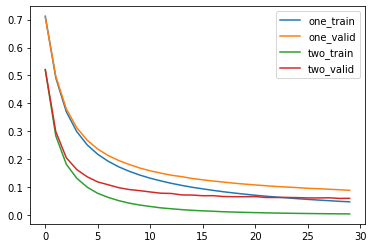

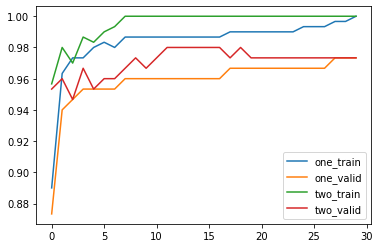

test accuracy of one layer Adam manual:  tensor(97.3333)
test accuracy of two layer Adam manual:  tensor(96.6667)
test accuracy of one layer Adam:  tensor(0.9733)
test accuracy of two layer Adam:  tensor(0.9667)


In [10]:
######################################################################
# main
######################################################################

def main():

    # fix random seed
    np.random.seed(0)
    torch.manual_seed(0)

    # load data with correct file path

    ### ========== TODO : START ========== ###
    data_directory_path =  "/content/drive/My Drive/CSM146/HW3"
    ### ========== TODO : END ========== ###

    # X.shape = (n_examples, n_features)
    # y.shape = (n_examples, )
    X_train, y_train = load_data(os.path.join(data_directory_path, "hw3_train.csv"))
    X_valid, y_valid = load_data(os.path.join(data_directory_path, "hw3_valid.csv"))
    X_test, y_test = load_data(os.path.join(data_directory_path, "hw3_test.csv"))

    ### ========== TODO : START ========== ###
    ### part a: print out three training images with different labels
    plot_img(X_train[0])
    plot_img(X_train[15])
    plot_img(X_train[5])
    plt.show()
    
    ### ========== TODO : END ========== ###

    print("Data preparation...")

    ### ========== TODO : START ========== ###
    ### part b: convert numpy arrays to tensors
    X_train_tens = torch.from_numpy(X_train)
    y_train_tens = torch.from_numpy(y_train)
    X_valid_tens = torch.from_numpy(X_valid)
    y_valid_tens = torch.from_numpy(y_valid)
    X_test_tens = torch.from_numpy(X_test)
    y_test_tens = torch.from_numpy(y_test)
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part c: prepare dataloaders for training, validation, and testing
    ###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
    ### train_loader = ...
    ### valid_loader = ...
    ### test_loader = ...
    ds_train = torch.utils.data.TensorDataset(X_train_tens, y_train_tens)
    ds_valid = torch.utils.data.TensorDataset(X_valid_tens, y_valid_tens)
    ds_test = torch.utils.data.TensorDataset(X_test_tens, y_test_tens)
    train_loader = torch.utils.data.DataLoader(ds_train, batch_size=10, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(ds_valid, batch_size=10, shuffle=True)
    test_loader = torch.utils.data.DataLoader(ds_test, batch_size=10, shuffle=False)
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part e: prepare OneLayerNetwork, criterion, and optimizer
    ### model_one = ...
    ### criterion = ...
    ### optimizer = ...

    model_one = OneLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005)
    
    ### ========== TODO : END ========== ###

    print("Start training OneLayerNetwork...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    ### ========== TODO : START ========== ###
    ### part h: prepare TwoLayerNetwork, criterion, and optimizer
    ### model_two = ...
    ### criterion = ...
    ### optimizer = ...
    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_two.parameters(), lr=0.0005)
    ### ========== TODO : END ========== ###

    print("Start training TwoLayerNetwork...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    ### ========== TODO : START ========== ###
    ### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
    ### ========== TODO : END ========== ###
    plt.plot(one_train_loss, label='one_train')
    plt.plot(one_valid_loss, label='one_valid')
    plt.plot(two_train_loss, label='two_train')
    plt.plot(two_valid_loss, label='two_valid')
    plt.legend()
    plt.show()
    ### ========== TODO : START ========== ###
    ### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
    plt.plot(one_train_acc, label='one_train')
    plt.plot(one_valid_acc, label='one_valid')
    plt.plot(two_train_acc, label='two_train')
    plt.plot(two_valid_acc, label='two_valid')
    plt.legend()
    plt.show()
    ### ========== TODO : END ========== ##

    ### ========== TODO : START ========== ###
    ### part k: calculate the test accuracy
    #manual
    one_correct = 0
    two_correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
      #use model to get prediction
      one_outputs = model_one(batch_X)
      two_outputs = model_two(batch_X)
      _, one_predicted = torch.max(one_outputs.data, 1)
      _, two_predicted = torch.max(two_outputs.data, 1)
      total+= batch_y.size(0)
      #compare predicted and test
      one_correct+= (one_predicted == batch_y).sum()
      two_correct+= (two_predicted == batch_y).sum()
    one_accuracy = 100 * one_correct/total
    two_accuracy = 100 * two_correct/total
    print("test accuracy of one layer manual: ", one_accuracy)
    print("test accuracy of two layer manual: ", two_accuracy)

    #using defined function evaluate_acc
    print("test accuracy of one layer: ", evaluate_acc(model_one, test_loader))
    print("test accuracy of two layer: ", evaluate_acc(model_two, test_loader))
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
    model_one = OneLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)

    print("Start training OneLayerNetwork with Adam...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)

    print("Start training TwoLayerNetwork...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    #adam loss plot
    plt.plot(one_train_loss, label='one_train')
    plt.plot(one_valid_loss, label='one_valid')
    plt.plot(two_train_loss, label='two_train')
    plt.plot(two_valid_loss, label='two_valid')
    plt.legend()
    plt.show()

    #adam accuracy plot
    plt.plot(one_train_acc, label='one_train')
    plt.plot(one_valid_acc, label='one_valid')
    plt.plot(two_train_acc, label='two_train')
    plt.plot(two_valid_acc, label='two_valid')
    plt.legend()
    plt.show()

    #adam test accuracy
    #manual
    one_correct = 0
    two_correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
      #use model to get prediction
      one_outputs = model_one(batch_X)
      two_outputs = model_two(batch_X)
      _, one_predicted = torch.max(one_outputs.data, 1)
      _, two_predicted = torch.max(two_outputs.data, 1)
      total+= batch_y.size(0)
      #compare predicted and test
      one_correct+= (one_predicted == batch_y).sum()
      two_correct+= (two_predicted == batch_y).sum()
    one_accuracy = 100 * one_correct/total
    two_accuracy = 100 * two_correct/total
    print("test accuracy of one layer Adam manual: ", one_accuracy)
    print("test accuracy of two layer Adam manual: ", two_accuracy)

    #using defined function evaluate_acc
    print("test accuracy of one layer Adam: ", evaluate_acc(model_one, test_loader))
    print("test accuracy of two layer Adam: ", evaluate_acc(model_two, test_loader))
    ### ========== TODO : END ========== ###



if __name__ == "__main__":
    main()